In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from joblib import dump
from matplotlib import pyplot
import random
import seaborn as sns
from datetime import datetime

from matplotlib.ticker import FuncFormatter

### Unión de los DataFrame para analítica de datos

In [3]:
customers_dataframe = pd.read_csv('Clientes autos nuevos.csv')

In [4]:
aftermarket_dataframe = pd.read_csv('Clientes postventa.csv')

In [5]:
customers_dataframe.head()

,id_cliente,edad,género,estado_civil,num_hijos,zona,transmisión,color_exterior,color_interior,tipo_interior,compra,pago,plazo_credito,enganche,canal_atracción,marca,modelo,tipo_auto,motor,Customer_Category
0,1,39,F,Soltero,2,Norte,Automática,Negro,Beige,Tela,Usado,Contado,NaN,NaN,Teléfono,BMW,7 Series,Sedan,3.0L,Category 3
1,2,33,F,Soltero,2,Norte,Automática,Rojo,Negro,Tela,Nuevo,Contado,NaN,NaN,Email,BMW,X3,SUV,2.0L,Category 2
2,3,41,M,Soltero,1,Sur,Automática,Blanco,Beige,Cuero,Usado,Crédito,72 meses,>25%,Website,BMW,5 Series,Sedan,3.0L,Category 1
3,4,50,M,Casado,2,Norte,Manual,Gris,Negro,Cuero,Usado,Contado,NaN,NaN,Website,BMW,7 Series,Sedan,4.4L,Category 3
4,5,32,M,Soltero,1,Norte,Manual,Negro,Negro,Cuero,Nuevo,Crédito,72 meses,>25%,Website,BMW,X3,SUV,3.0L,Category 4


In [6]:
aftermarket_dataframe.head()

,id_cliente,kilometraje,num_mantenimientos,monto_mantenimientos,num_serv_adicionales,categoria_serv_adicionales,monto_serv_adicionales,días_entre_serv_adicionales,num_accesorios,monto_accesorios,...,tipo_contribuyente,promedio_monto_mantenimientos,promedio_serv_adicionales,promedio_monto_accesorios,promedio_monto_hojalatería,promedio_monto_siniestros,año_modelo,última_fecha_entrada,estado_garantía,Customer_Category
0,1,120000,24,63010,3,otros,8046,758,3,8051,...,p_física,2625.416667,2682.0,2683.666667,7638.666667,24793.0,2018,2021-05-06,Extendida,Category 2
1,2,20000,0,0,3,suspensión,12885,141,2,8509,...,p_física,0.000000,4295.0,4254.500000,0.000000,0.0,2023,2023-08-24,Dentro,Category 3
2,3,80000,24,62858,1,alineación,10563,379,0,0,...,p_física,2619.083333,10563.0,0.000000,7896.333333,21811.0,2020,2022-09-26,Extendida,Category 2
3,4,120000,24,59001,0,NaN,0,311,0,0,...,p_moral,2458.375000,0.0,0.000000,5899.666667,10192.0,2018,2020-11-22,Extendida,Category 2
4,5,10000,0,0,5,scanner,5525,0,2,11872,...,p_física,0.000000,1105.0,5936.000000,12658.000000,0.0,2024,NaN,Dentro,Category 3


In [7]:
# Replace NaN values with 'NA' in customers_dataframe
customers_dataframe.fillna('NA', inplace=True)
# Replace NaN values with 'NA' in aftermarket_dataframe
aftermarket_dataframe.fillna('NA', inplace=True)

In [8]:
customers_dataframe.drop(columns=['Customer_Category'], inplace=True)
aftermarket_dataframe.drop(columns=['Customer_Category'], inplace=True)

In [9]:
aftermarket_dataframe.loc[aftermarket_dataframe["num_serv_adicionales"] == 0, ['categoria_serv_adicionales']] = "NA"

In [10]:
merged_dataframe = pd.merge(customers_dataframe, aftermarket_dataframe, on='id_cliente', how='inner')

In [11]:
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     10000 non-null  int64  
 1   edad                           10000 non-null  int64  
 2   género                         10000 non-null  object 
 3   estado_civil                   10000 non-null  object 
 4   num_hijos                      10000 non-null  int64  
 5   zona                           10000 non-null  object 
 6   transmisión                    10000 non-null  object 
 7   color_exterior                 10000 non-null  object 
 8   color_interior                 10000 non-null  object 
 9   tipo_interior                  10000 non-null  object 
 10  compra                         10000 non-null  object 
 11  pago                           10000 non-null  object 
 12  plazo_credito                  10000 non-null  

In [12]:
merged_dataframe[merged_dataframe.isna()==True].value_counts()

Series([], Name: count, dtype: int64)

### EDA del DataFrame final

In [14]:
# Group by 'año_modelo' and count the total entries
model_year_counts = merged_dataframe.groupby('año_modelo').size().reset_index(name='total_entries')

# Display the counts
model_year_counts

,año_modelo,total_entries
0,2017,1639
1,2018,1657
2,2019,1690
3,2020,1660
4,2021,869
5,2022,796
6,2023,827
7,2024,862


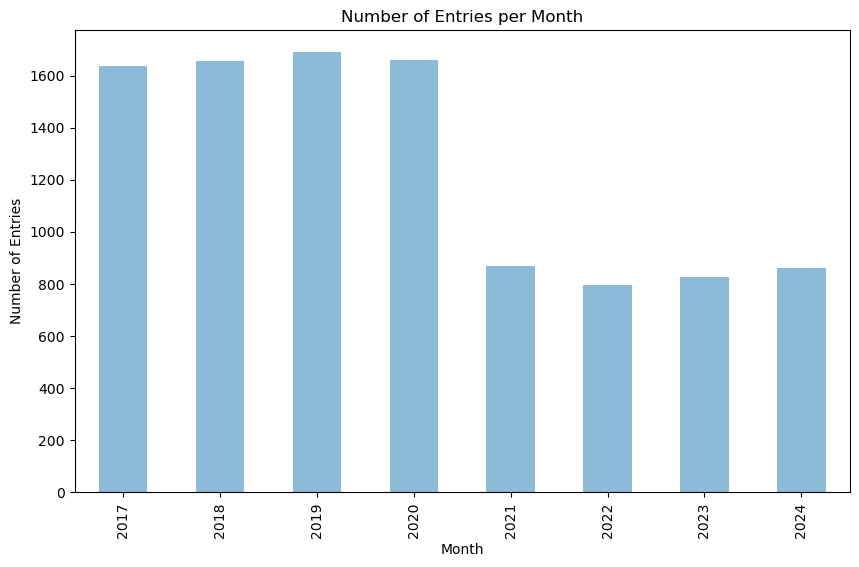

In [15]:
# Plot the histogram
plt.figure(figsize=(10, 6))
merged_dataframe['año_modelo'].value_counts().sort_index().plot(kind='bar',alpha=0.5)

# Add titles and labels
plt.title('Number of Entries per Month')
plt.xlabel('Month')
plt.ylabel('Number of Entries')

# Show the plot
plt.show()

In [16]:
merged_dataframe['última_fecha_entrada'] = pd.to_datetime(merged_dataframe['última_fecha_entrada'], errors='coerce')
merged_dataframe['año_última_entrada'] = merged_dataframe['última_fecha_entrada'].dt.to_period('Y')

# Group by 'año_modelo' and count the total entries
year_counts = merged_dataframe.groupby('año_última_entrada').size().reset_index(name='total_entries')

# Display the counts
year_counts

,año_última_entrada,total_entries
0,2017,275
1,2018,685
2,2019,1201
3,2020,1532
4,2021,1672
5,2022,1637
6,2023,1872
7,2024,264


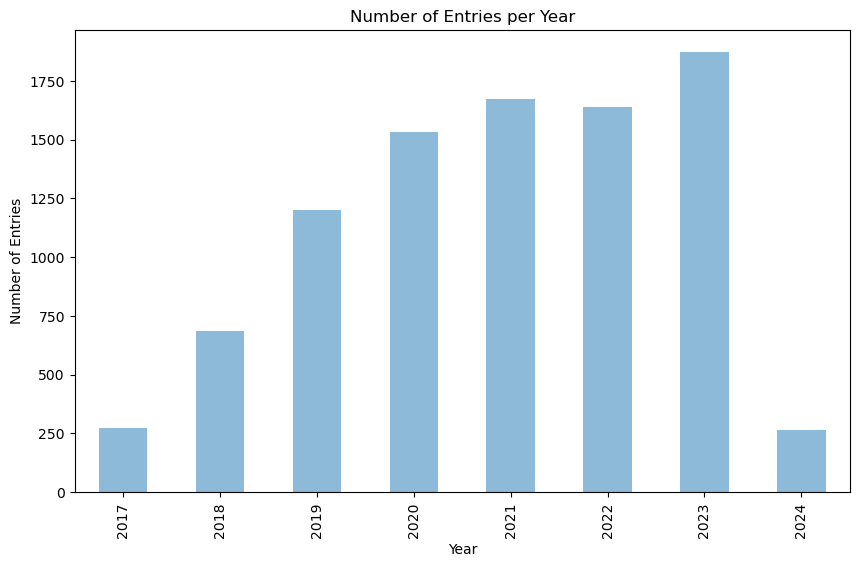

In [17]:
# Count the number of entries per month
entries_per_month = merged_dataframe['año_última_entrada'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
entries_per_month.plot(kind='bar',alpha=0.5)

# Add titles and labels
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')

# Show the plot
plt.show()

In [18]:
# Group by 'año_modelo' and count the total entries
kilometers = merged_dataframe.groupby('kilometraje').size().reset_index(name='total_entries')

# Display the counts
kilometers

,kilometraje,total_entries
0,10000,862
1,20000,827
2,40000,796
3,60000,869
4,80000,1660
5,100000,1690
6,120000,1657
7,140000,1639


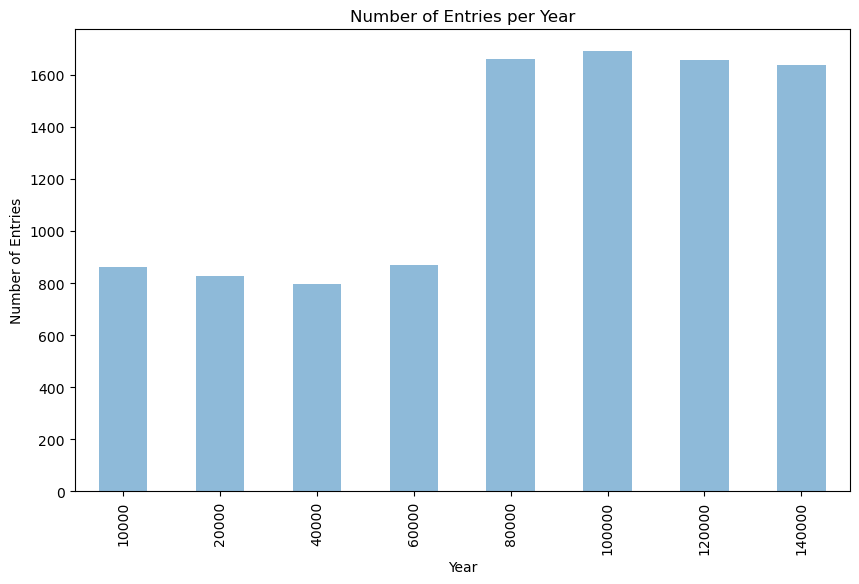

In [19]:
# Count the number of entries per month
kilometraje = merged_dataframe['kilometraje'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
kilometraje.plot(kind='bar',alpha=0.5)

# Add titles and labels
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')

# Show the plot
plt.show()

### Query para campaña publicitaria

In [21]:
media_promedio_monto_mantenimientos = merged_dataframe['promedio_monto_mantenimientos'].mean()

In [22]:
media_promedio_monto_mantenimientos

12003.05773340873

In [23]:
query_ejemplo = merged_dataframe[
    (merged_dataframe['año_modelo'] <= 2021) &
    (merged_dataframe['kilometraje'] > 60000) &
    (merged_dataframe['num_mantenimientos'] < 6) &
    (merged_dataframe['promedio_monto_mantenimientos'] > 15000) &
    (merged_dataframe['estado_garantía'] == 'Fuera') &
    (merged_dataframe['num_serv_adicionales'] >= 1) &
    (merged_dataframe['promedio_serv_adicionales'] >= 3000) &
    (merged_dataframe['dias_entre_mantenimientos'] > 180) &
    (merged_dataframe['pago'] == 'Crédito') &
    (merged_dataframe['plazo_credito'].isin(['48 meses', '60 meses', '72 meses']))
]

In [24]:
query_ejemplo.to_csv('query_ejemplo.csv', index=False)

In [25]:
query_ejemplo

,id_cliente,edad,género,estado_civil,num_hijos,zona,transmisión,color_exterior,color_interior,tipo_interior,...,tipo_contribuyente,promedio_monto_mantenimientos,promedio_serv_adicionales,promedio_monto_accesorios,promedio_monto_hojalatería,promedio_monto_siniestros,año_modelo,última_fecha_entrada,estado_garantía,año_última_entrada
62,63,23,M,Divorciado,0,Centro,Manual,Blanco,Beige,Cuero,...,p_moral,59936.000000,5873.0,0.000000,6869.666667,7277.333333,2018,2020-12-29,Fuera,2020
85,86,29,M,Divorciado,1,Norte,Manual,Negro,Negro,Tela,...,p_moral,15572.750000,4060.5,3219.000000,12403.000000,0.000000,2019,2021-08-02,Fuera,2021
188,189,26,M,Soltero,2,Norte,Manual,Rojo,Negro,Cuero,...,p_moral,20653.666667,7054.5,5446.500000,0.000000,18531.000000,2017,2019-02-27,Fuera,2019
216,217,27,F,Soltero,1,Norte,Automática,Azul,Beige,Cuero,...,p_física,20434.000000,6744.0,0.000000,7086.000000,8619.500000,2019,2021-12-31,Fuera,2021
287,288,40,M,Soltero,2,Norte,Manual,Blanco,Negro,Cuero,...,p_moral,20647.333333,5293.0,4344.500000,20498.000000,11121.500000,2018,2019-07-20,Fuera,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9722,9723,36,F,Casado,1,Norte,Automática,Blanco,Negro,Tela,...,p_moral,30633.500000,3183.0,3131.333333,7329.666667,7591.666667,2017,2018-07-25,Fuera,2018
9724,9725,27,F,Soltero,1,Norte,Manual,Rojo,Beige,Tela,...,p_física,28756.000000,4785.5,4968.000000,10201.500000,7301.000000,2018,2020-08-03,Fuera,2020
9742,9743,20,M,Divorciado,2,Norte,Automática,Negro,Beige,Tela,...,p_moral,58804.000000,5045.0,0.000000,9897.500000,0.000000,2020,2021-02-08,Fuera,2021
9834,9835,56,M,Casado,2,Norte,Automática,Gris,Gris,Cuero,...,p_física,61551.000000,4249.0,0.000000,7706.000000,7077.000000,2019,2020-07-22,Fuera,2020


In [26]:
query_ejemplo['promedio_monto_mantenimientos']. describe()

count      178.000000
mean     33345.898408
std      17212.139685
min      15048.000000
25%      19260.916667
50%      29109.250000
75%      54750.500000
max      66231.000000
Name: promedio_monto_mantenimientos, dtype: float64

#### Tabla de parámetros

In [28]:
# Define the parameters of the query
query_params = {
    'Parameter': [
        'año_modelo',
        'kilometraje',
        'num_mantenimientos',
        'promedio_monto_mantenimientos',
        'estado_garantía',
        'num_serv_adicionales',
        'promedio_serv_adicionales',
        'dias_entre_mantenimientos',
        'enganche',
        'plazo_credito'
    ],
    'Condition': [
        '<= 2021',
        '> 60000',
        '> 6',
        f'< {media_promedio_monto_mantenimientos}',  # Assuming this variable is defined
        '== "Fuera"',
        '>= 2',
        '>= 3000',
        '> 360',
        '== "<25%"',
        'isin(["48 meses", "60 meses", "72 meses"])'
    ]
}

# Create a DataFrame from the parameters
query_params_df = pd.DataFrame(query_params)

# Display the DataFrame
query_params_df

,Parameter,Condition
0,año_modelo,<= 2021
1,kilometraje,> 60000
2,num_mantenimientos,> 6
3,promedio_monto_mantenimientos,< 12003.05773340873
4,estado_garantía,"== ""Fuera"""
5,num_serv_adicionales,>= 2
6,promedio_serv_adicionales,>= 3000
7,dias_entre_mantenimientos,> 360
8,enganche,"== ""<25%"""
9,plazo_credito,"isin([""48 meses"", ""60 meses"", ""72 meses""])"


#### Creación de los rangos

In [30]:
# Define bins and labels for each parameter
bins_and_labels = {
    'edad': ([0, 40, 60, 100], ['20-40', '40-60', '60+']),
    'kilometraje': ([60000, 80000, 100000, 150000], ['60-80K', '80-100K', '>100K']),
    'num_mantenimientos': ([1, 2, 3, 4], ['2','3','4']),
    'promedio_monto_mantenimientos': ([10000, 20000, 30000, 40000], ['<$20000', '<$30000', '<$40000']),
    'dias_entre_mantenimientos': ([200,300 ,400 ,500 ], ['>200', '>300', '>400']),
    'num_serv_adicionales': ([2, 3, 4, 5], ['>2', '>3', '>4']),
    'monto_serv_adicionales': ([0, 5000, 10000, 20000], ['< $5,000', '$5,000-10,000', '<$20,000']),
    'días_entre_serv_adicionales': ([0, 90, 180, 365], ['0-90', '91-180', '180+'])
    }

# Apply binning
for col, (bins, labels) in bins_and_labels.items():
    query_ejemplo[f'{col}_group'] = pd.cut(query_ejemplo[col], bins=bins, labels=labels, right=False)

# Define columns to summarize and create summary
summary = {}
for col, (bins, labels) in bins_and_labels.items():
    group_col = f'{col}_group'
    summary[group_col] = (query_ejemplo[group_col].value_counts(normalize=True) * 100).reindex(labels, fill_value=0).round(2).to_dict()

# Additional parameters without binning
additional_params = ['tipo_auto', 'estado_garantía']
for param in additional_params:
    summary[param] = (query_ejemplo[param].value_counts(normalize=True) * 100).round(2).to_dict()

# Create summary DataFrame
summary_df = pd.DataFrame(summary)

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\2760629788.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_ejemplo[f'{col}_group'] = pd.cut(query_ejemplo[col], bins=bins, labels=labels, right=False)
C:\Users\festu\AppData\Local\Temp\ipykernel_10684\2760629788.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_ejemplo[f'{col}_group'] = pd.cut(query_ejemplo[col], bins=bins, labels=labels, right=False)
C:\Users\festu\AppData\Local\Temp\ipykernel_10684\2760629788.py:15: SettingWithCopyWarni

#### Visualización de los rangos

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\1818714953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_ejemplo[f'{column}_cat'] = pd.cut(query_ejemplo[column], bins=bins, labels=labels, right=False)
C:\Users\festu\AppData\Local\Temp\ipykernel_10684\1818714953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_ejemplo[f'{column}_cat'] = pd.cut(query_ejemplo[column], bins=bins, labels=labels, right=False)
C:\Users\festu\AppData\Local\Temp\ipykernel_10684\1818714953.py:6: SettingWithCopy

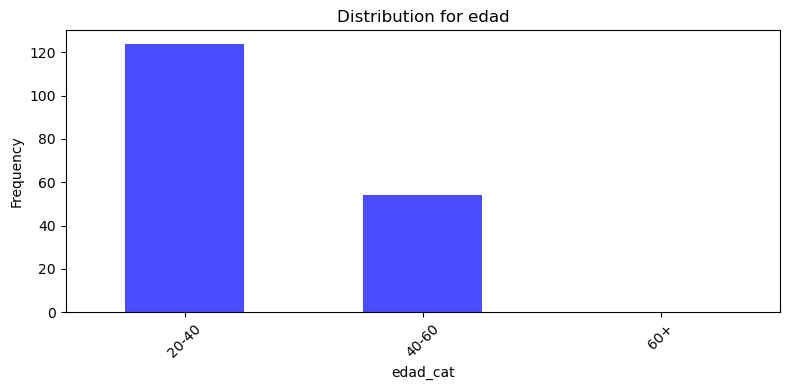

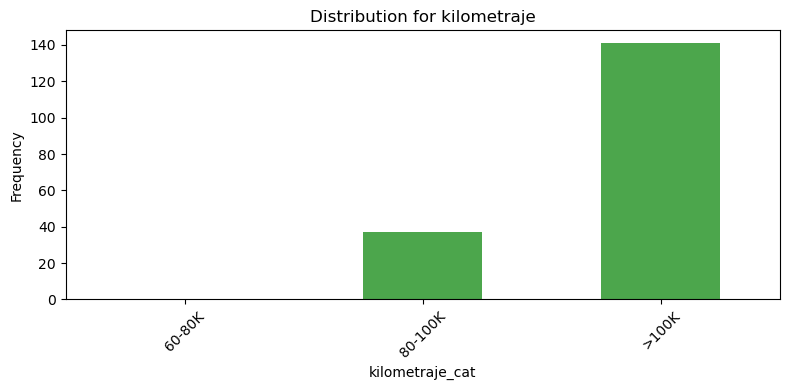

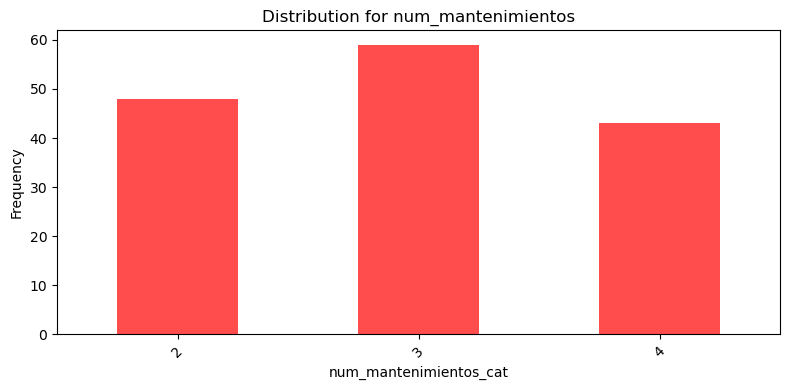

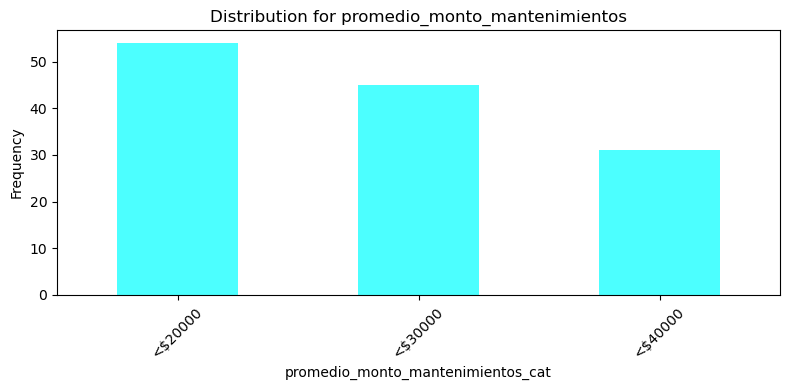

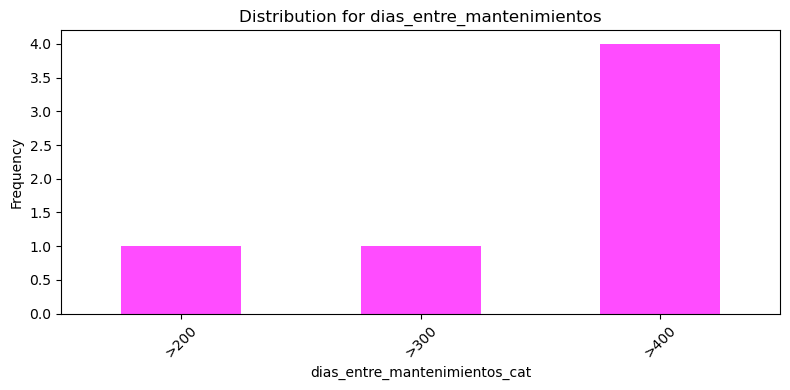

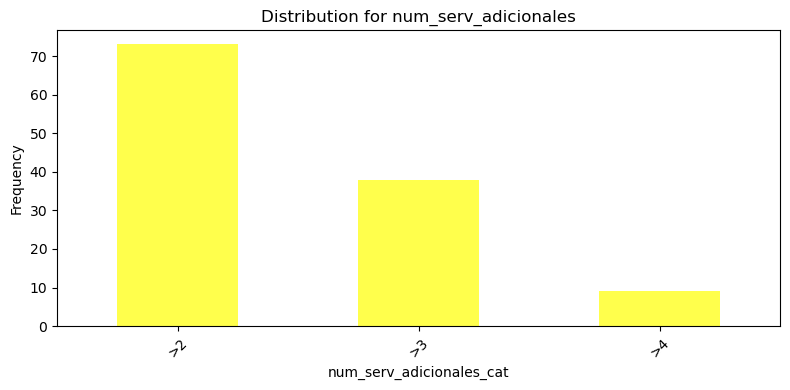

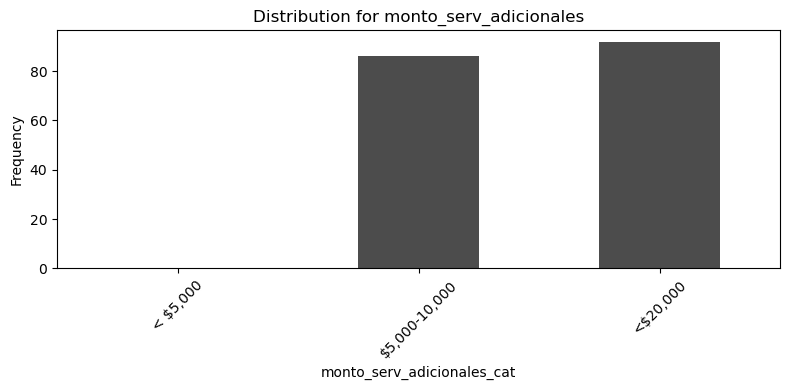

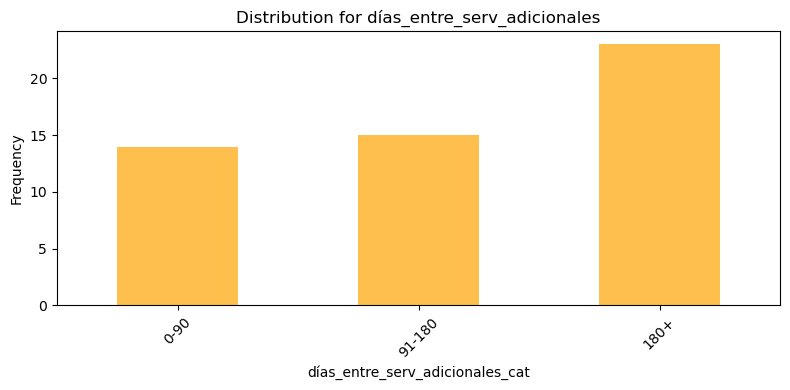

In [32]:
# Define a list of colors
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']

# Apply bins and labels to create new categorical columns
for column, (bins, labels) in bins_and_labels.items():
    query_ejemplo[f'{column}_cat'] = pd.cut(query_ejemplo[column], bins=bins, labels=labels, right=False)

# Function to plot the distribution of each parameter in their bins
def plot_distributions(query_ejemplo, bins_and_labels):
    for i, column in enumerate(bins_and_labels.keys()):
        cat_column = f'{column}_cat'
        distribution = query_ejemplo[cat_column].value_counts().sort_index()
        
        # Set figure size
        plt.figure(figsize=(8, 4))
        
        # Plot distribution with specified color
        distribution.plot(kind='bar', color=colors[i % len(colors)], alpha=0.7)
        plt.title(f'Distribution for {column}')
        plt.xlabel(cat_column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Plot the distributions
plot_distributions(query_ejemplo, bins_and_labels)

In [33]:
final = summary_df.T

In [34]:
final.to_excel('summary.xlsx', index=True)

### Creación de ejemplos de analítica avanzada

#### Análisis de la venta de vehículos 

In [37]:
merged_dataframe_1 = merged_dataframe[merged_dataframe.applymap(str).ne('NA').all(axis=1)]

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\282057980.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_dataframe_1 = merged_dataframe[merged_dataframe.applymap(str).ne('NA').all(axis=1)]


In [38]:
merged_dataframe['año_modelo'] = pd.to_numeric(merged_dataframe['año_modelo'])
recent_models = merged_dataframe[merged_dataframe['año_modelo'] >= merged_dataframe['año_modelo'].max() - 4]

# Grouping data for the main plot
grouped_data = recent_models.groupby(['año_modelo', 'pago', 'tipo_auto']).size().reset_index(name='total_sales')

# Create pivot table to facilitate stacking
pivot_data = grouped_data.pivot_table(
    index='año_modelo',
    columns=['pago', 'tipo_auto'],
    values='total_sales',
    fill_value=0
)

# Calculate percentage distribution for each category
total_sales_per_year = grouped_data.groupby('año_modelo')['total_sales'].sum()
grouped_data['percentage'] = grouped_data.apply(lambda row: (row.total_sales / total_sales_per_year[row.año_modelo]) * 100, axis=1)

# Create pivot table with percentages
pivot_percentage = grouped_data.pivot_table(
    index='año_modelo',
    columns=['pago', 'tipo_auto'],
    values='percentage',
    fill_value=0
)

# Calculate percentage distribution of zona
zona_distribution = (
    recent_models.groupby(['año_modelo', 'zona']).size().reset_index(name='count')
)
zona_distribution['percentage'] = zona_distribution.groupby('año_modelo')['count'].transform(lambda x: 100 * x / x.sum())

# Create pivot table for zona percentages
pivot_zona_percentage = zona_distribution.pivot_table(
    index='año_modelo', 
    columns='zona', 
    values='percentage', 
    fill_value=0
)

In [39]:
pivot_data

pago       Contado        Crédito       
tipo_auto      SUV  Sedan     SUV  Sedan
año_modelo                              
2020         332.0  492.0   319.0  517.0
2021         180.0  255.0   174.0  260.0
2022         166.0  253.0   148.0  229.0
2023         175.0  249.0   152.0  251.0
2024         193.0  251.0   171.0  247.0

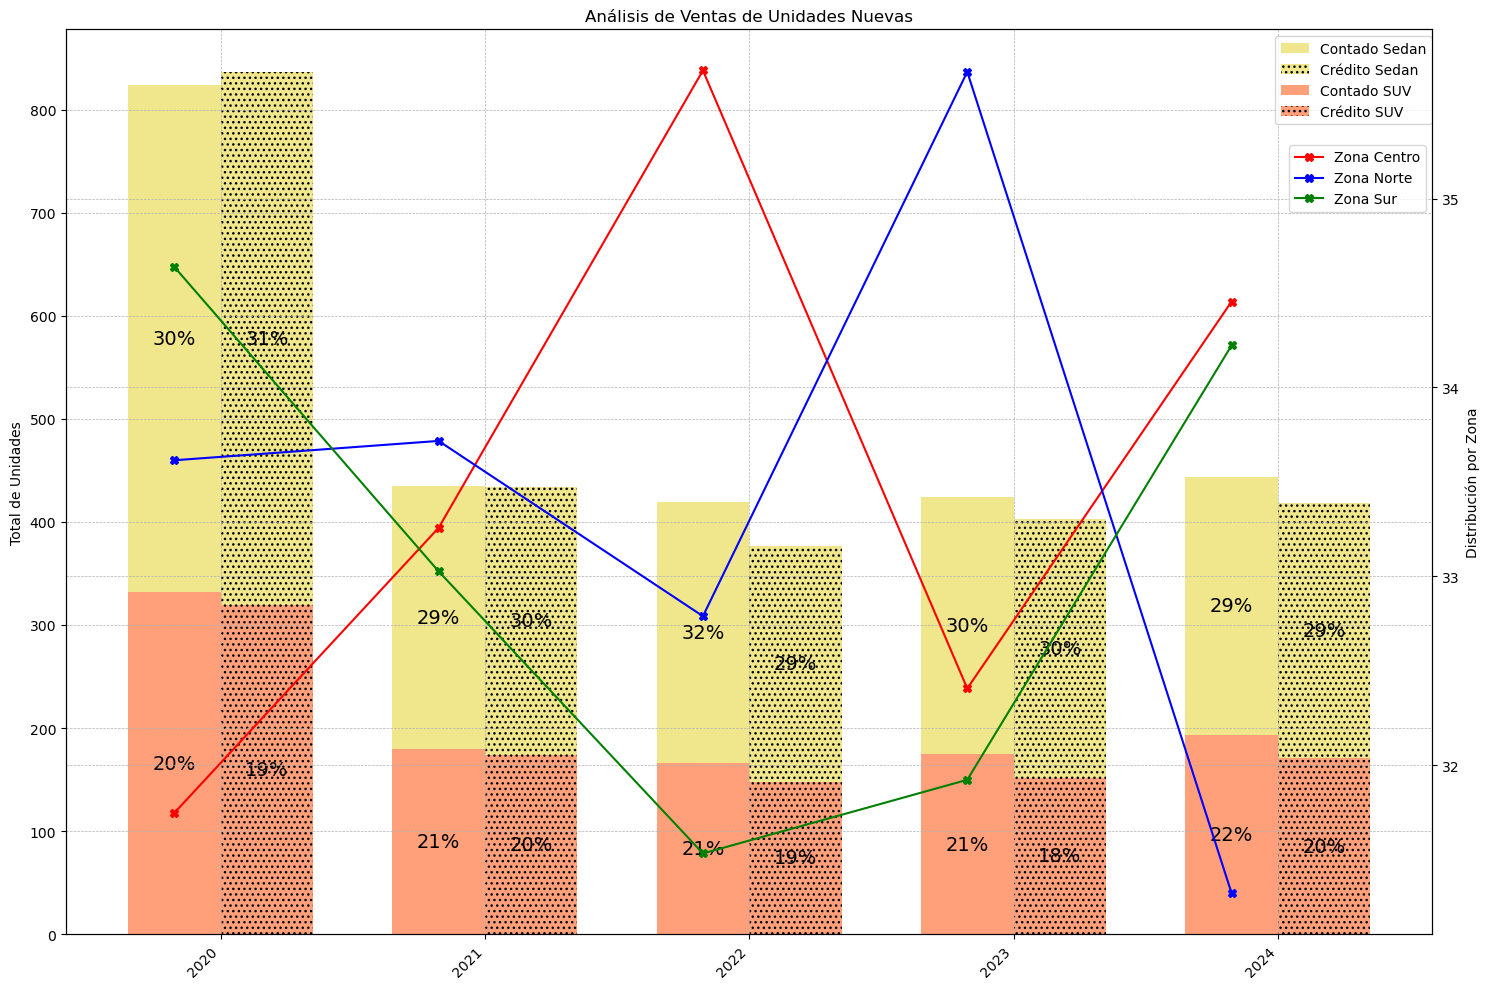

In [40]:
# Add data labels
def add_labels(bars, percentages, bottom_bars=None):
    font_properties = {
        'family': 'serif',  # Font family
        'weight': 'bold',  # Font weight
        'size': 10,  # Font size
        'style': 'italic'  # Font style (optional)
    }
    
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        if bottom_bars:
            bottom_height = bottom_bars.get(bar.get_x(), 0).get_height() if bar.get_x() in bottom_bars else 0
            label_position = bottom_height + (height / 2)
        else:
            label_position = height / 2
        main_ax.text(
            bar.get_x() + bar.get_width() / 2, 
            label_position, 
            f'{int(round(percentage))}%',  # Round to nearest integer and convert to int
            ha='center', 
            va='center', 
            color='black', 
            size= 14  # Apply font properties
        )

# Example usage (assuming other parts of your code remain unchanged)
fig, main_ax = plt.subplots(figsize=(15, 10))

# Define bar width and positions
bar_width = 0.35
bar_positions = list(range(len(pivot_data)))

# Plot bars for 'Contado'
contado_suv = pivot_data[('Contado', 'SUV')]
contado_sedan = pivot_data[('Contado', 'Sedan')]
contado_suv_percentage = pivot_percentage[('Contado', 'SUV')]
contado_sedan_percentage = pivot_percentage[('Contado', 'Sedan')]

bars1 = main_ax.bar(bar_positions, contado_suv, bar_width, label='Contado SUV', color='#FFA07A')
bars2 = main_ax.bar(bar_positions, contado_sedan, bar_width, bottom=contado_suv, label='Contado Sedan', color='khaki')

# Plot bars for 'Crédito'
credito_suv = pivot_data[('Crédito', 'SUV')]
credito_sedan = pivot_data[('Crédito', 'Sedan')]
credito_suv_percentage = pivot_percentage[('Crédito', 'SUV')]
credito_sedan_percentage = pivot_percentage[('Crédito', 'Sedan')]

bars3 = main_ax.bar([p + bar_width for p in bar_positions], credito_suv, bar_width, label='Crédito SUV', color='#FFA07A', hatch='...')
bars4 = main_ax.bar([p + bar_width for p in bar_positions], credito_sedan, bar_width, bottom=credito_suv, label='Crédito Sedan', color='khaki', hatch='...')

# Creating dictionaries for bottom bar positions for proper label placement
bottom_bars1 = {bar.get_x(): bar for bar in bars1}
bottom_bars3 = {bar.get_x(): bar for bar in bars3}

# Adding labels to bars
add_labels(bars1, contado_suv_percentage)
add_labels(bars2, contado_sedan_percentage, bottom_bars1)
add_labels(bars3, credito_suv_percentage)
add_labels(bars4, credito_sedan_percentage, bottom_bars3)

# Create a secondary y-axis
secax = main_ax.twinx()

# Plot lines for 'Zona' percentages using red, blue, and green palette
colors = ['red', 'blue', 'green']
for zona, color in zip(pivot_zona_percentage.columns, colors):
    secax.plot(bar_positions, pivot_zona_percentage[zona], marker='X', label=f'Zona {zona}', color=color)

# Customize main plot
main_ax.set_xlabel('')
main_ax.set_ylabel('Total de Unidades')
secax.set_ylabel('Distribución por Zona')
main_ax.set_title('Análisis de Ventas de Unidades Nuevas')
main_ax.set_xticks([p + bar_width / 2 for p in bar_positions])
main_ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')

# Collect handles and labels
handles_main, labels_main = main_ax.get_legend_handles_labels()
handles_sec, labels_sec = secax.get_legend_handles_labels()

# Separate handles and labels for bars and lines
handles_bars = handles_main[:4]
labels_bars = labels_main[:4]
handles_lines = handles_sec
labels_lines = labels_sec

# Specify the new order for the bars
order_bars = [1,3, 0, 2]  # Adjust the indices as needed
handles_bars = [handles_bars[i] for i in order_bars]
labels_bars = [labels_bars[i] for i in order_bars]

# Add legend for bars on main axis
main_ax.legend(handles_bars, labels_bars, loc='upper left', bbox_to_anchor=(0.88, 1))
# Add legend for lines on secondary axis
secax.legend(handles_lines, labels_lines, loc='upper right', bbox_to_anchor=(1, 0.88))

# Add gridlines
main_ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
secax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [41]:
# Grouping data by 'año_modelo' and 'tipo_contribuyente'
grouped_data = merged_dataframe.groupby(['año_modelo', 'tipo_contribuyente']).size().reset_index(name='total_unidades')

# Calculate total number of units for each 'año_modelo'
total_units_per_year = merged_dataframe.groupby('año_modelo').size().reset_index(name='total_units')

# Merge the total units with the grouped data
percentage_data = pd.merge(grouped_data, total_units_per_year, on='año_modelo')

# Calculate the percentage
percentage_data['percentage'] = 100 * percentage_data['total_unidades'] / percentage_data['total_units']

# Pivot the table to get the desired format
pivot_percentage_data = percentage_data.pivot_table(
    index='tipo_contribuyente', 
    columns='año_modelo', 
    values='percentage',
    fill_value=0
)

# Round to one decimal place and add '%' sign
pivot_percentage_data = pivot_percentage_data.applymap(lambda x: f'{x:.1f}%')

# Display the DataFrame
pivot_percentage_data

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\2867718980.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_percentage_data = pivot_percentage_data.applymap(lambda x: f'{x:.1f}%')


año_modelo,2017,2018,2019,2020,2021,2022,2023,2024
tipo_contribuyente,,,,,,,,
p_física,48.0%,51.1%,49.8%,48.9%,51.2%,50.8%,49.1%,47.8%
p_moral,52.0%,48.9%,50.2%,51.1%,48.8%,49.2%,50.9%,52.2%


In [42]:
# Grouping data by 'año_modelo' and 'zona'
grouped_data_zona = merged_dataframe.groupby(['año_modelo', 'zona']).size().reset_index(name='total_unidades')

# Calculate total number of units for each 'año_modelo'
total_units_per_year_zona = merged_dataframe.groupby('año_modelo').size().reset_index(name='total_units')

# Merge the total units with the grouped data
percentage_data_zona = pd.merge(grouped_data_zona, total_units_per_year_zona, on='año_modelo')

# Calculate the percentage
percentage_data_zona['percentage'] = 100 * percentage_data_zona['total_unidades'] / percentage_data_zona['total_units']

# Pivot the table to get the desired format
pivot_percentage_data_zona = percentage_data_zona.pivot_table(
    index='zona', 
    columns='año_modelo', 
    values='percentage',
    fill_value=0
)

# Round to one decimal place and add '%' sign
pivot_percentage_data_zona = pivot_percentage_data_zona.applymap(lambda x: f'{x:.1f}%')

# Display the DataFrame
pivot_percentage_data_zona

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\1310255266.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_percentage_data_zona = pivot_percentage_data_zona.applymap(lambda x: f'{x:.1f}%')


año_modelo,2017,2018,2019,2020,2021,2022,2023,2024
zona,,,,,,,,
Centro,34.3%,31.6%,33.6%,31.7%,33.3%,35.7%,32.4%,34.5%
Norte,32.0%,35.6%,33.0%,33.6%,33.7%,32.8%,35.7%,31.3%
Sur,33.7%,32.8%,33.4%,34.6%,33.0%,31.5%,31.9%,34.2%


#### Análisis del área de hojalatería y pintura

In [44]:
# Convert 'última_fecha_entrada' to datetime and extract the year
merged_dataframe['última_fecha_entrada'] = pd.to_datetime(merged_dataframe['última_fecha_entrada'])

# Fill NA values with a placeholder (e.g., 0 or -1) before extracting the year
merged_dataframe['última_fecha_entrada'].fillna(pd.Timestamp('2020-01-01'), inplace=True)
merged_dataframe['year_entrada'] = merged_dataframe['última_fecha_entrada'].dt.year.astype(int)


# Filter to include only rows with num_siniestros > 0
recent_models = merged_dataframe[(merged_dataframe['year_entrada'] >= 2020) & (merged_dataframe['year_entrada'] < 2024)]

siniestros_df = recent_models[recent_models['num_siniestros'] > 0]

# Grouping data for the main plot
grouped_data = siniestros_df.groupby(['year_entrada', 'categoria_siniestro']).size().reset_index(name='total_siniestros')

# Create pivot table for the main bar plot
pivot_data = grouped_data.pivot_table(
    index='year_entrada',
    columns='categoria_siniestro',
    values='total_siniestros',
    fill_value=0
)

# Calculate percentage distribution of zona
total_vehicles_per_year = siniestros_df.groupby('year_entrada').size()
zona_distribution = (
    siniestros_df.groupby(['year_entrada', 'zona']).size().reset_index(name='count')
)
zona_distribution['percentage'] = zona_distribution.groupby('year_entrada')['count'].transform(lambda x: 100 * x / total_vehicles_per_year.loc[x.name])

# Create pivot table for zona percentages
pivot_zona_percentage = zona_distribution.pivot_table(
    index='year_entrada', 
    columns='zona', 
    values='percentage', 
    fill_value=0
)

# Calculate percentage distribution of tipo_pago
tipo_pago_distribution = (
    siniestros_df.groupby(['year_entrada', 'tipo_pago']).size().reset_index(name='count')
)
tipo_pago_distribution['percentage'] = tipo_pago_distribution.groupby('year_entrada')['count'].transform(lambda x: 100 * x / x.sum())

# Create pivot table for tipo_pago percentages
pivot_tipo_pago = tipo_pago_distribution.pivot_table(
    index='tipo_pago', 
    columns='year_entrada', 
    values='percentage', 
    fill_value=0
)

# Calculate promedio_monto_siniestros by year_entrada
promedio_monto_siniestros = siniestros_df.groupby('year_entrada')['promedio_monto_siniestros'].mean().reset_index()

# Transpose the promedio_monto_siniestros for better alignment with the main plot
promedio_monto_siniestros = promedio_monto_siniestros.set_index('year_entrada').T

# Calculate the percentage for each category within each year
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

In [45]:
pivot_data

categoria_siniestro,público,seguro
year_entrada,,
2020,948.0,888.0
2021,613.0,633.0
2022,642.0,592.0
2023,690.0,695.0


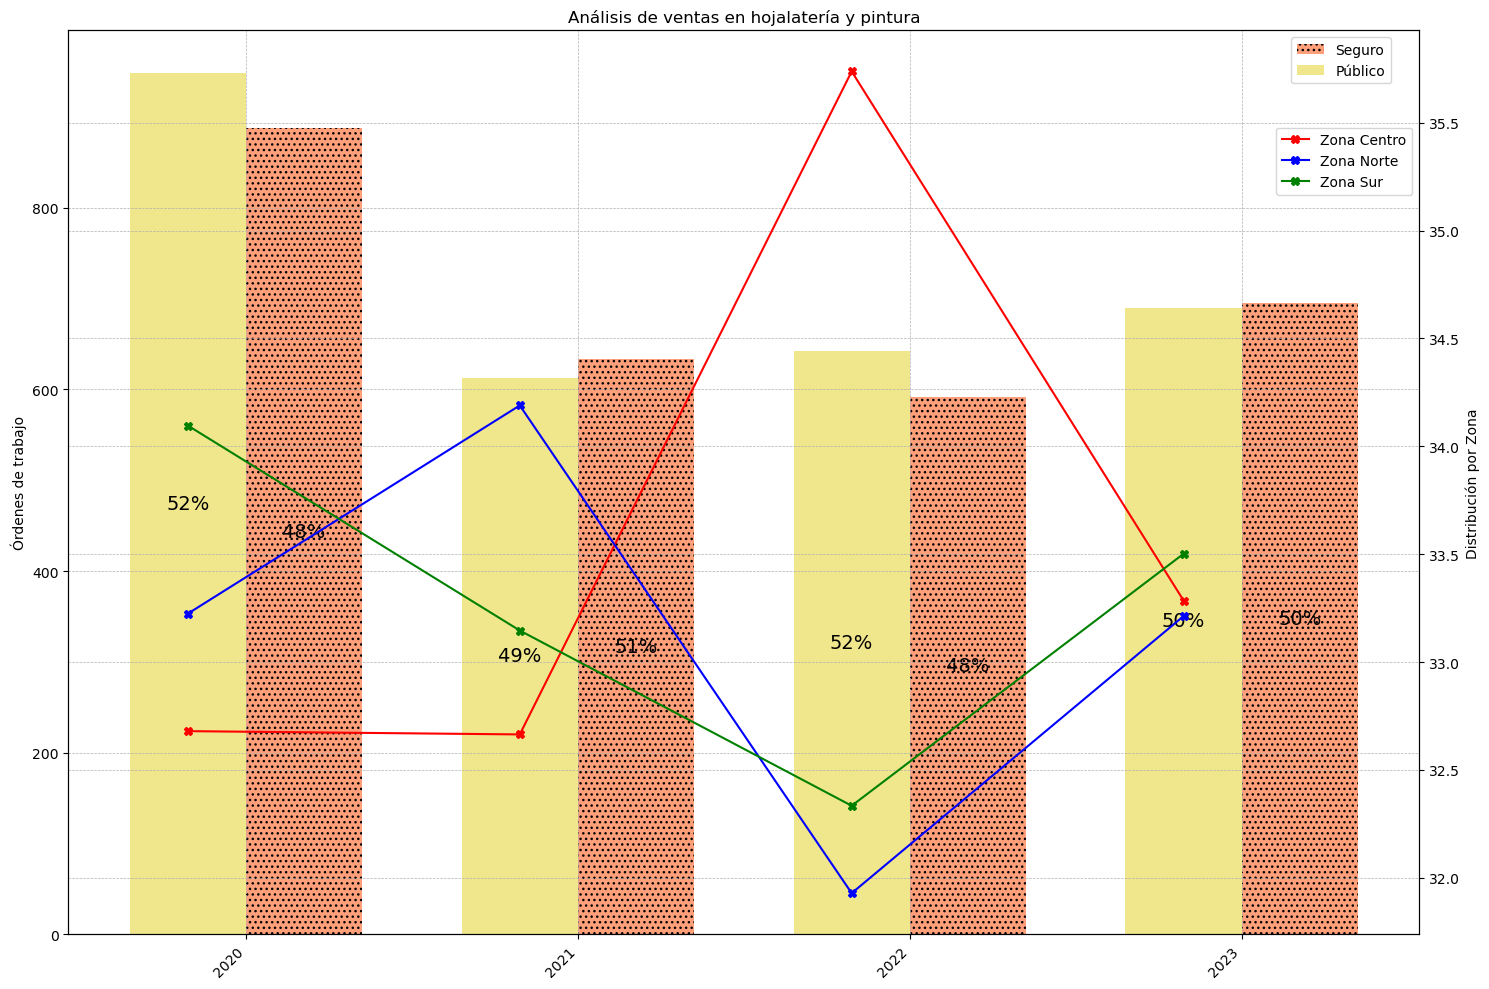

In [46]:
# Add data labels
def add_labels(bars, percentages, bottom_bars=None):
    font_properties = {
        'family': 'serif',  # Font family
        'weight': 'bold',  # Font weight
        'size': 10,  # Font size
        'style': 'italic'  # Font style (optional)
    }
    
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        if bottom_bars:
            bottom_height = bottom_bars.get(bar.get_x(), 0).get_height() if bar.get_x() in bottom_bars else 0
            label_position = bottom_height + (height / 2)
        else:
            label_position = height / 2
        main_ax.text(
            bar.get_x() + bar.get_width() / 2, 
            label_position, 
            f'{int(round(percentage))}%',  # Round to nearest integer and convert to int
            ha='center', 
            va='center', 
            color='black', 
            size= 14  # Apply font properties
        )

# Example usage (assuming other parts of your code remain unchanged)
fig, main_ax = plt.subplots(figsize=(15, 10))

# Define bar width and positions
bar_width = 0.35
bar_positions = list(range(len(pivot_data)))

# Plot bars for 'público'
público = pivot_data[('público')]
público_percentage = pivot_data_percentage[('público')]

bar_positions = list(range(len(público)))

bars1 = main_ax.bar(bar_positions, público, bar_width, label='Público', color='khaki')

# Plot bars for 'seguro'
seguro = pivot_data[('seguro')]
seguro_percentage = pivot_data_percentage[('seguro')]

bars2 = main_ax.bar([p + bar_width for p in bar_positions], seguro, bar_width, label='Seguro', color='#FFA07A', hatch='...')

# Creating dictionaries for bottom bar positions for proper label placement
bottom_bars1 = {bar.get_x(): bar for bar in bars1}

# Adding labels to bars
add_labels(bars1, público_percentage)
add_labels(bars2, seguro_percentage, bottom_bars1)

# Create a secondary y-axis
secax = main_ax.twinx()

# Plot lines for 'Zona' percentages using red, blue, and green palette
colors = ['red', 'blue', 'green']
for zona, color in zip(pivot_zona_percentage.columns, colors):
    secax.plot(bar_positions, pivot_zona_percentage[zona], marker='X', label=f'Zona {zona}', color=color)

# Customize main plot
main_ax.set_xlabel('')
main_ax.set_ylabel('Órdenes de trabajo')
secax.set_ylabel('Distribución por Zona')
main_ax.set_title('Análisis de ventas en hojalatería y pintura')
main_ax.set_xticks([p + bar_width / 2 for p in bar_positions])
main_ax.set_xticklabels(pivot_data.index, rotation=45, ha='right')

# Collect handles and labels
handles_main, labels_main = main_ax.get_legend_handles_labels()
handles_sec, labels_sec = secax.get_legend_handles_labels()

# Separate handles and labels for bars and lines
handles_bars = handles_main[:2]  # Adjust the range based on the number of bar labels you have
labels_bars = labels_main[:2]
handles_lines = handles_sec
labels_lines = labels_sec

# Specify the new order for the bars
order_bars = [1, 0]  # Adjust the indices as needed
handles_bars = [handles_bars[i] for i in order_bars]
labels_bars = [labels_bars[i] for i in order_bars]

# Add legend for bars on main axis
main_ax.legend(handles_bars, labels_bars, loc='upper left', bbox_to_anchor=(0.9, 1))
# Add legend for lines on secondary axis
secax.legend(handles_lines, labels_lines, loc='upper right', bbox_to_anchor=(1, 0.9))

# Add gridlines
main_ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
secax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [47]:
# Grouping data by 'año_modelo' and 'tipo_auto' to calculate average 'monto_siniestros'
grouped_data = merged_dataframe.groupby(['año_modelo', 'tipo_auto'])['monto_siniestros'].mean().reset_index()

# Pivot the table to get the desired format
pivot_average_monto_siniestros = grouped_data.pivot_table(
    index='tipo_auto', 
    columns='año_modelo', 
    values='monto_siniestros',
    fill_value=0
)

# Format the values to one decimal digit and apply the $ sign
pivot_average_monto_siniestros = pivot_average_monto_siniestros.applymap(lambda x: f'${x:.1f}')

# Display the DataFrame
pivot_average_monto_siniestros

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\2253322916.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_average_monto_siniestros = pivot_average_monto_siniestros.applymap(lambda x: f'${x:.1f}')


año_modelo,2017,2018,2019,2020,2021,2022,2023,2024
tipo_auto,,,,,,,,
SUV,$15525.4,$14896.4,$14885.6,$15354.7,$14924.5,$14934.1,$14119.0,$15323.1
Sedan,$15386.0,$14960.9,$15279.3,$14949.7,$14570.8,$15409.7,$14883.6,$15151.3


#### Análisis de servicios adicionales

In [49]:
# Convert 'última_fecha_entrada' to datetime and extract the year
merged_dataframe['última_fecha_entrada'] = pd.to_datetime(merged_dataframe['última_fecha_entrada'])
merged_dataframe['year_entrada'] = merged_dataframe['última_fecha_entrada'].dt.year

# Filter the data to include only years from 2020 to 2023
filtered_data = merged_dataframe[(merged_dataframe['year_entrada'] >= 2020) & (merged_dataframe['year_entrada'] <= 2023)]

# Separate the data based on 'estado_garantía'
dentro_data = filtered_data[filtered_data['estado_garantía'] == 'Dentro']
fuera_data = filtered_data[filtered_data['estado_garantía'] == 'Fuera']
extendida_data = filtered_data[filtered_data['estado_garantía'] == 'Extendida']

# Grouping data for the main plot using 'year_entrada'
mantenimiento_dentro_data = dentro_data.groupby('year_entrada').agg({
    'monto_serv_adicionales': 'sum',
    'num_serv_adicionales': 'sum'
}).reset_index()

mantenimiento_fuera_data = fuera_data.groupby('year_entrada').agg({
    'monto_serv_adicionales': 'sum',
    'num_serv_adicionales': 'sum'
}).reset_index()

mantenimiento_extendida_data = extendida_data.groupby('year_entrada').agg({
    'monto_serv_adicionales': 'sum',
    'num_serv_adicionales': 'sum'
}).reset_index()

# Ensure all data frames have the same 'year_entrada' values
all_years = pd.DataFrame({'year_entrada': range(2020, 2024)})
mantenimiento_dentro_data = pd.merge(all_years, mantenimiento_dentro_data, on='year_entrada', how='left').fillna(0)
mantenimiento_fuera_data = pd.merge(all_years, mantenimiento_fuera_data, on='year_entrada', how='left').fillna(0)
mantenimiento_extendida_data = pd.merge(all_years, mantenimiento_extendida_data, on='year_entrada', how='left').fillna(0)

# Calculate the gross profit assuming a 35% margin
mantenimiento_dentro_data['gross_profit'] = mantenimiento_dentro_data['monto_serv_adicionales'] * 0.35
mantenimiento_fuera_data['gross_profit'] = mantenimiento_fuera_data['monto_serv_adicionales'] * 0.35
mantenimiento_extendida_data['gross_profit'] = mantenimiento_extendida_data['monto_serv_adicionales'] * 0.35

C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\festu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

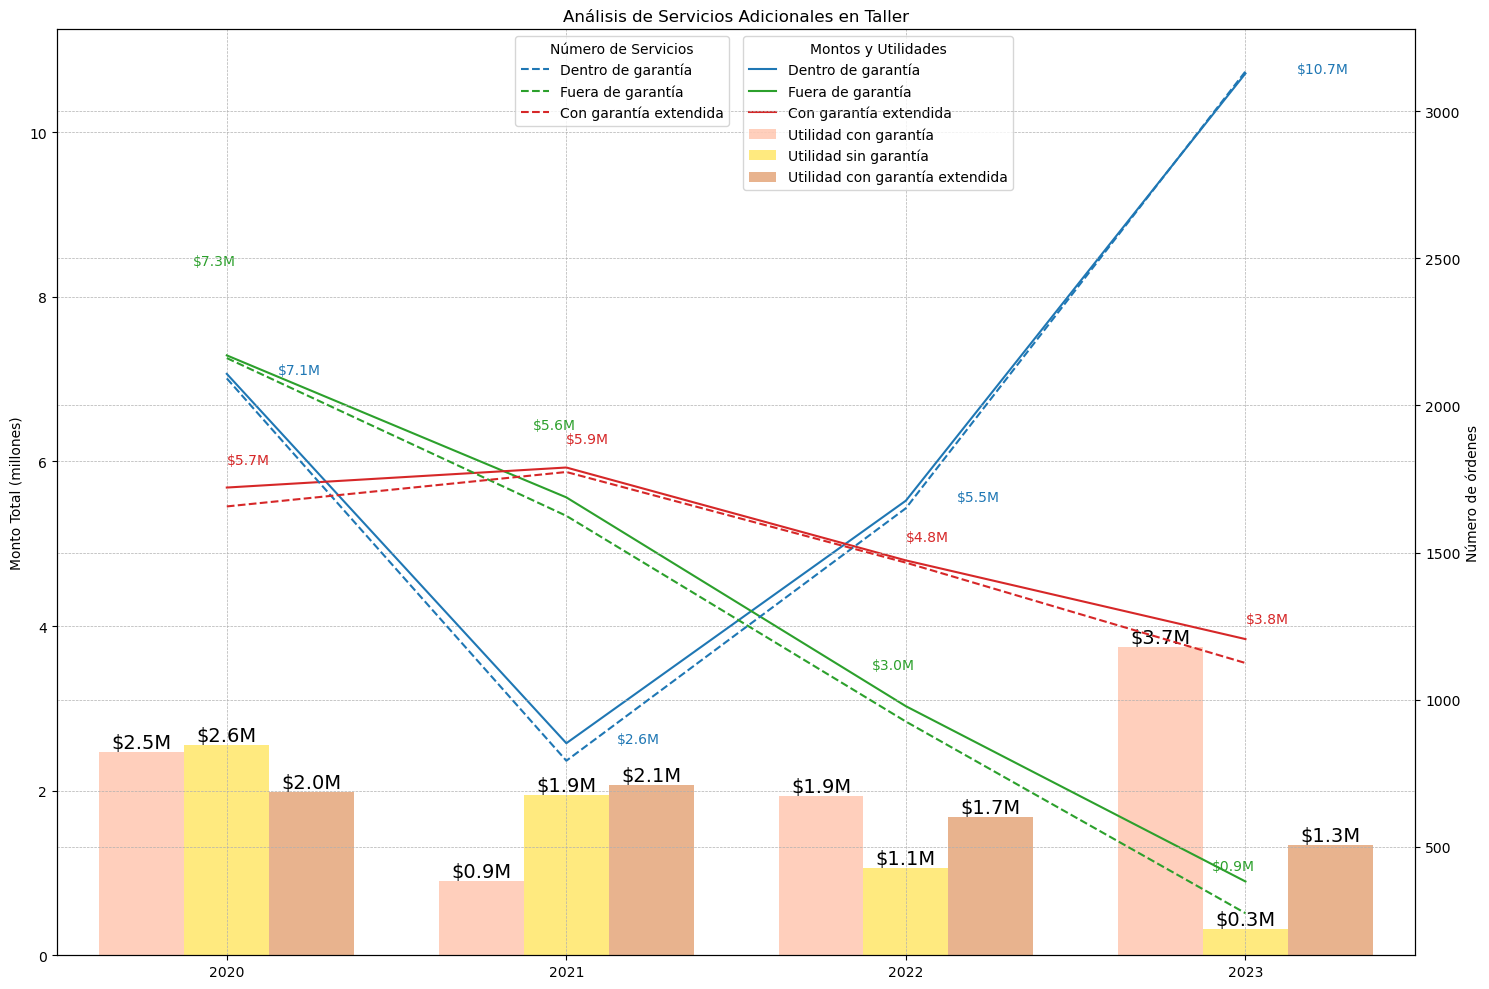

In [96]:
# Custom formatter to scale the y-axis
def millions(x, pos):
    return '%1.0f' % (x / 1000000)

# Plotting the main chart with secondary line plot
fig, main_ax = plt.subplots(figsize=(15, 10))

# Plotting total 'monto_serv_adicionales' with connecting lines on the main axis
sns.lineplot(data=mantenimiento_dentro_data, x='year_entrada', y='monto_serv_adicionales', marker='', ax=main_ax, label='Dentro de garantía', color='#1f77b4')  # Blue palette
sns.lineplot(data=mantenimiento_fuera_data, x='year_entrada', y='monto_serv_adicionales', marker='', ax=main_ax, label='Fuera de garantía', color='#2ca02c')  # Green palette
sns.lineplot(data=mantenimiento_extendida_data, x='year_entrada', y='monto_serv_adicionales', marker='', ax=main_ax, label='Con garantía extendida', color='#d62728')  # Red palette

# Create a secondary y-axis for 'num_serv_adicionales'
secax = main_ax.twinx()
sns.lineplot(data=mantenimiento_dentro_data, x='year_entrada', y='num_serv_adicionales', marker='', ax=secax, label='Dentro de garantía', color='#1f77b4', linestyle='--')  # Blue palette
sns.lineplot(data=mantenimiento_fuera_data, x='year_entrada', y='num_serv_adicionales', marker='', ax=secax, label='Fuera de garantía', color='#2ca02c', linestyle='--')  # Green palette
sns.lineplot(data=mantenimiento_extendida_data, x='year_entrada', y='num_serv_adicionales', marker='', ax=secax, label='Con garantía extendida', color='#d62728', linestyle='--')  # Red palette

# Plotting gross profit as bars with transparency (alpha=0.5)
bar_width = 0.25
bar_positions = mantenimiento_dentro_data['year_entrada']
bars_dentro = main_ax.bar(bar_positions - bar_width, mantenimiento_dentro_data['gross_profit'], width=bar_width, color='#FFA07A', alpha=0.5, label='Utilidad con garantía')  # Light Salmon
bars_fuera = main_ax.bar(bar_positions, mantenimiento_fuera_data['gross_profit'], width=bar_width, color='gold', alpha=0.5, label='Utilidad sin garantía')  # Gold
bars_extendida = main_ax.bar(bar_positions + bar_width, mantenimiento_extendida_data['gross_profit'], width=bar_width, color='#D2691E', alpha=0.5, label='Utilidad con garantía extendida')  # Chocolate

# Adding data labels to each bar
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        main_ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'${height/1000000:,.1f}M', ha='center', va='bottom', fontsize=14, color='black'
        )

     
add_bar_labels(bars_dentro)
add_bar_labels(bars_fuera)
add_bar_labels(bars_extendida)

# Adding title and labels
main_ax.set_xlabel('')
main_ax.set_ylabel('Monto Total (millones)')
secax.set_ylabel('Número de órdenes')
main_ax.set_title('Análisis de Servicios Adicionales en Taller')

# Set x-axis limits to show only 2020 through 2023
main_ax.set_xlim(2019.5, 2023.5)

# Ensure x-axis shows integer model years
main_ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adding data labels to the lines with visual space
horizontal_offset = 0.1  # Adjust this value as needed for horizontal spacing
vertical_offset = 0.05  # Adjust this value as needed for vertical spacing

for i, row in mantenimiento_dentro_data.iterrows():
    main_ax.text(
        row['year_entrada'] + 0.15, 
        row['monto_serv_adicionales']  + 0.00 * row['monto_serv_adicionales'] , 
        f'${row["monto_serv_adicionales"] / 1000000:.1f}M', 
        color='#1f77b4', 
        ha='left', 
        fontsize=10
    )

for i, row in mantenimiento_fuera_data.iterrows():
    main_ax.text(
        row['year_entrada'] - 0.10, 
        row['monto_serv_adicionales'] + 0.15 * row['monto_serv_adicionales'] , 
        f'${row["monto_serv_adicionales"] / 1000000:.1f}M', 
        color='#2ca02c', 
        ha='left', 
        fontsize=10
    )

for i, row in mantenimiento_extendida_data.iterrows():
    main_ax.text(
        row['year_entrada'] + 0, 
        row['monto_serv_adicionales']  + vertical_offset * row['monto_serv_adicionales'] , 
        f'${row["monto_serv_adicionales"] / 1000000:.1f}M', 
        color='#d62728', 
        ha='left', 
        fontsize=10
    )

    
# Customize the legends
lines_labels_main = main_ax.get_legend_handles_labels()
lines_labels_sec = secax.get_legend_handles_labels()

main_ax.legend(lines_labels_main[0], lines_labels_main[1], loc='upper left', bbox_to_anchor=(0.5, 1), title='Montos y Utilidades')
secax.legend(lines_labels_sec[0], lines_labels_sec[1], loc='upper right', bbox_to_anchor=(0.5, 1), title='Número de Servicios')

# Apply the custom formatter to the y-axis
main_ax.yaxis.set_major_formatter(FuncFormatter(millions))

# Add gridlines
main_ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
secax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [51]:
# Grouping data by 'año_modelo' to calculate average 'monto_serv_adicionales'
average_monto_serv_adicionales = merged_dataframe.groupby('año_modelo')['monto_serv_adicionales'].mean().reset_index()

# Pivot the table to get the desired format
pivot_average_monto_serv_adicionales = average_monto_serv_adicionales.pivot_table(
    columns='año_modelo', 
    values='monto_serv_adicionales',
    aggfunc='mean'
)

# Rename the index to 'Ticket promedio'
pivot_average_monto_serv_adicionales.index = ['Ticket promedio']

# Format the values to one decimal digit and apply the $ sign
pivot_average_monto_serv_adicionales = pivot_average_monto_serv_adicionales.applymap(lambda x: f'${x:.1f}')

# Display the DataFrame
pivot_average_monto_serv_adicionales


C:\Users\festu\AppData\Local\Temp\ipykernel_10684\87130372.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_average_monto_serv_adicionales = pivot_average_monto_serv_adicionales.applymap(lambda x: f'${x:.1f}')


año_modelo,2017,2018,2019,2020,2021,2022,2023,2024
Ticket promedio,$8263.0,$8329.6,$8288.6,$8400.0,$8136.9,$8387.1,$8148.8,$8194.1


In [52]:
# Remove rows with any NA values
filtered_data = merged_dataframe.dropna(how='any')

# Grouping data by 'año_modelo' and 'categoria_serv_adicionales' to calculate the sum of 'monto_serv_adicionales'
grouped_data = filtered_data.groupby(['año_modelo', 'categoria_serv_adicionales'])['monto_serv_adicionales'].sum().reset_index()

# Calculate the total 'monto_serv_adicionales' for each 'año_modelo'
total_per_year = filtered_data.groupby('año_modelo')['monto_serv_adicionales'].sum().reset_index()

# Merge the total with the grouped data
percentage_data = pd.merge(grouped_data, total_per_year, on='año_modelo', suffixes=('', '_total'))

# Calculate the percentage
percentage_data['percentage'] = 100 * percentage_data['monto_serv_adicionales'] / percentage_data['monto_serv_adicionales_total']

# Pivot the table to get the desired format
pivot_percentage_data = percentage_data.pivot_table(
    index='categoria_serv_adicionales', 
    columns='año_modelo', 
    values='percentage',
    fill_value=0
)

# Define the desired order of rows
desired_order = ['alineación', 'eléctricos', 'frenos', 'llantas', 'suspensión', 'scanner', 'otros']

# Reorder the rows according to the desired order
pivot_percentage_data = pivot_percentage_data.reindex(desired_order)

# Round to one decimal place and add '%' sign
pivot_percentage_data = pivot_percentage_data.applymap(lambda x: f'{x:.1f}%')

# Display the DataFrame
pivot_percentage_data

C:\Users\festu\AppData\Local\Temp\ipykernel_10684\663508965.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_percentage_data = pivot_percentage_data.applymap(lambda x: f'{x:.1f}%')


año_modelo,2017,2018,2019,2020,2021,2022,2023
categoria_serv_adicionales,,,,,,,
alineación,13.8%,15.2%,15.4%,13.2%,14.0%,13.6%,15.3%
eléctricos,12.9%,13.6%,14.4%,14.7%,14.9%,15.8%,14.3%
frenos,14.0%,15.0%,14.6%,14.9%,14.0%,15.1%,15.6%
llantas,14.3%,15.4%,12.5%,14.9%,12.7%,13.5%,12.9%
suspensión,14.6%,12.7%,13.5%,13.8%,15.7%,13.0%,14.7%
scanner,13.8%,14.0%,15.2%,15.1%,16.2%,13.0%,12.7%
otros,16.6%,14.2%,14.3%,13.3%,12.6%,16.1%,14.5%
